In [1]:
import cv2
import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow_numpy(img, figsize=(4, 4)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(img)
    plt.show()


def imread(filepath):
    return cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)


def imwrite(filepath, img):
    cv2.imwrite(filepath, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [3]:
dataset_path = '../data/datasets/junior-cell-segmentation'
masks_path = os.path.join(dataset_path, 'labels')

In [ ]:
def mask_to_directions(mask):
    h, w, _ = mask.shape

    centers = {
        'r': (w, h / 2),
        'd': (w / 2, h),
        'l': (0, h / 2),
        'u': (w / 2, 0),
    }
    scores = {d: 0 for d in centers.keys()}

    dist2 = lambda x1, y1, x2, y2: (x1 - x2) ** 2 + (y1 - y2) ** 2

    for i in range(h):
        for j in range(w):
            pix = mask[i, j, 0] / 255
            dists = [
                (dist2(v[0] / w, v[1] / h, j / w, i / h), k) 
                for k, v in centers.items()
            ]
            min_dist, min_center = min(dists)
            scores[min_center] += pix / (1 + min_dist)
    scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    print(scores)
    
    scores = scores[:2]
    return [x[0] for x in scores]

[('u', np.float64(16.75379013485401)), ('d', np.float64(16.73591422548583)), ('r', np.float64(0.0)), ('l', np.float64(0.0))]
['u', 'd']


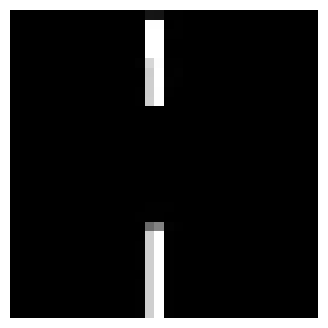

In [47]:
filenames = os.listdir(masks_path)

index = 8

filepath = os.path.join(masks_path, filenames[index])
mask = imread(filepath)
mask = cv2.resize(mask, (32, 32))

# mask = np.full((640, 640, 3), 255)
print(mask_to_directions(mask))

imshow_numpy(mask)

In [17]:
215 / 33, 187 / 27

(6.515151515151516, 6.925925925925926)